# Impact of medication for lifestyle Diseases on Hospital readmission

In [7]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization

In [8]:
# Read the data with pandas
df = pd.read_csv("Train-1617360447408-1660719685476.csv", header=0)

In [9]:
df

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [10]:
df.shape     # checking total rows and columns

(66587, 49)

In [11]:
df.dtypes    #checking type of data

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [12]:
df.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [13]:
df.drop(['encounter_id','index','weight',"medical_specialty"], axis=1, inplace=True)     
# dropped 'encounter_id'as patient_id and encounter_id is same
#as here serial no. is mentioned index not require
#weight is full "?" so not getting any info
# dropping medical_specialty bcoz it's strings with huge no. of missing values, which we can't change into categorical value

In [14]:
df.head()

,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,51521940,Hispanic,Male,[80-90),4,39,1,9,1,1,...,No,No,No,No,No,No,No,No,Yes,1
1,92631357,Caucasian,Male,[60-70),3,34,1,12,0,0,...,No,No,No,No,No,No,No,No,No,0
2,30023982,Caucasian,Female,[50-60),6,50,2,24,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,93606021,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,23464296,Caucasian,Male,[70-80),9,17,1,11,0,0,...,No,No,No,No,No,No,No,No,No,1


In [15]:
df.tail()

,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
66582,23450508,Caucasian,Female,[70-80),11,40,4,35,0,0,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,29324601,Caucasian,Male,[80-90),4,39,1,7,0,0,...,No,No,No,No,No,No,No,No,No,1
66584,2179062,Caucasian,Female,[60-70),2,24,1,13,0,0,...,No,No,No,No,No,No,No,No,Yes,1
66585,20531754,?,Female,[80-90),4,39,1,14,0,0,...,No,No,No,No,No,No,No,No,No,0
66586,81985473,Caucasian,Female,[80-90),2,38,2,12,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [16]:
df['race'].mode()

0    Caucasian
dtype: object

In [17]:
df['race'].fillna(value = 'Caucasian', inplace = True)

In [18]:
df.head()

,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,51521940,Hispanic,Male,[80-90),4,39,1,9,1,1,...,No,No,No,No,No,No,No,No,Yes,1
1,92631357,Caucasian,Male,[60-70),3,34,1,12,0,0,...,No,No,No,No,No,No,No,No,No,0
2,30023982,Caucasian,Female,[50-60),6,50,2,24,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,93606021,AfricanAmerican,Female,[70-80),5,63,0,14,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,23464296,Caucasian,Male,[70-80),9,17,1,11,0,0,...,No,No,No,No,No,No,No,No,No,1


In [19]:
df=pd.get_dummies(df, columns = ['race','gender'])
#converted nominal data into numerical

In [20]:
# Converting non numerical column into numerical usin get dummies method

df = pd.get_dummies(df, columns = ["X1","X2","X3","X4","X5","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","change","diabetesMed"],drop_first = True)

In [21]:
df.head()

,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X20_Steady,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes
0,51521940,[80-90),4,39,1,9,1,1,4,783,...,0,0,1,0,0,0,0,0,1,1
1,92631357,[60-70),3,34,1,12,0,0,0,564,...,0,0,1,0,0,0,0,0,1,0
2,30023982,[50-60),6,50,2,24,0,0,5,574,...,0,0,1,0,0,0,0,0,0,1
3,93606021,[70-80),5,63,0,14,0,0,0,401,...,0,0,1,0,0,0,0,0,0,1
4,23464296,[70-80),9,17,1,11,0,0,0,311,...,0,0,1,0,0,0,0,0,1,0


In [22]:
df.groupby('age').size()

age
[0-10)        100
[10-20)       428
[20-30)      1154
[30-40)      2414
[40-50)      6324
[50-60)     11378
[60-70)     14845
[70-80)     17031
[80-90)     11080
[90-100)     1833
dtype: int64

In [23]:
age_id={'[0-10)'    :  0,
        '[10-20)'   :  10,
        '[20-30)'   :  20,
        '[30-40)'   :  30,
        '[40-50)'   :  40,
        '[50-60)'   :  50,
        '[60-70)'   :  60,
        '[70-80)'   :  70,
        '[80-90)'   :  80,
        '[90-100)'  : 90}

df['age_group']  = df.age.replace(age_id) 

In [24]:
df.dtypes

patient_id             int64
age                   object
time_in_hospital       int64
num_lab_procedures     int64
num_procedures         int64
                       ...  
X23_Steady             uint8
X24_Steady             uint8
change_No              uint8
diabetesMed_Yes        uint8
age_group              int64
Length: 80, dtype: object

In [25]:
df.head()

,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes,age_group
0,51521940,[80-90),4,39,1,9,1,1,4,783,...,0,1,0,0,0,0,0,1,1,80
1,92631357,[60-70),3,34,1,12,0,0,0,564,...,0,1,0,0,0,0,0,1,0,60
2,30023982,[50-60),6,50,2,24,0,0,5,574,...,0,1,0,0,0,0,0,0,1,50
3,93606021,[70-80),5,63,0,14,0,0,0,401,...,0,1,0,0,0,0,0,0,1,70
4,23464296,[70-80),9,17,1,11,0,0,0,311,...,0,1,0,0,0,0,0,1,0,70


In [26]:
df.drop(["age"], axis=1, inplace=True) 

In [27]:
df.drop(["diag_1","diag_2","diag_3","diag_4"], axis=1, inplace=True)

In [28]:
df.shape

(66587, 75)

In [29]:
df.dtypes

patient_id            int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
                      ...  
X23_Steady            uint8
X24_Steady            uint8
change_No             uint8
diabetesMed_Yes       uint8
age_group             int64
Length: 75, dtype: object

In [232]:
# calculating the correlation of complete dataset

corr = df.corr()
corr

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,...,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes,age_group
patient_id,1.000000,-0.024560,0.008258,-0.010764,0.027329,0.107852,0.064268,0.010618,0.001094,0.228001,...,0.059047,-0.030869,0.031599,-0.001539,-0.004126,-0.001285,0.020500,-0.058278,0.021300,0.068196
time_in_hospital,-0.024560,1.000000,0.317791,0.189862,0.466018,-0.004403,-0.014538,0.074129,-0.001322,0.217898,...,0.099129,0.003442,-0.003540,-0.004644,-0.005168,-0.003117,0.000007,-0.115280,0.065377,0.107769
num_lab_procedures,0.008258,0.317791,1.000000,0.068696,0.269419,-0.004809,-0.006951,0.045833,-0.007252,0.152295,...,0.067528,0.022961,-0.023037,-0.001287,-0.008742,-0.001010,0.002156,-0.060663,0.027380,0.020007
num_procedures,-0.010764,0.189862,0.068696,1.000000,0.388733,-0.024343,-0.043824,-0.067695,0.011024,0.074671,...,0.014169,0.004608,-0.003568,-0.003716,-0.006545,-0.003025,0.011525,-0.011333,-0.002727,-0.031524
num_medications,0.027329,0.466018,0.269419,0.388733,1.000000,0.051360,0.008086,0.065070,0.007218,0.262382,...,0.159361,-0.004850,0.005284,-0.004083,0.003533,-0.004306,0.019593,-0.250155,0.190012,0.040915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X23_Steady,-0.001285,-0.003117,-0.001010,-0.003025,-0.004306,-0.001160,-0.000858,0.004205,0.006583,-0.006866,...,-0.001374,0.000329,-0.000326,-0.000034,-0.000052,1.000000,-0.000034,-0.004191,0.002124,-0.000222
X24_Steady,0.020500,0.000007,0.002156,0.011525,0.019593,-0.002593,-0.001918,-0.001640,-0.008751,0.007061,...,-0.003072,0.000736,-0.000728,-0.000075,-0.000116,-0.000034,1.000000,-0.009371,0.004750,0.004952
change_No,-0.058278,-0.115280,-0.060663,-0.011333,-0.250155,-0.020896,-0.036277,-0.029927,-0.002127,-0.061518,...,-0.383337,0.046131,-0.044672,-0.009371,-0.010030,-0.004191,-0.009371,1.000000,-0.506826,0.034892
diabetesMed_Yes,0.021300,0.065377,0.027380,-0.002727,0.190012,0.015945,0.026777,0.033052,0.005963,0.024729,...,0.194285,-0.046556,0.046062,0.004750,0.007358,0.002124,0.004750,-0.506826,1.000000,-0.018834


# Data visualisation

[<matplotlib.patches.Rectangle object at 0x000001FEE4F458B0>, <matplotlib.patches.Rectangle object at 0x000001FEE4F45BE0>]


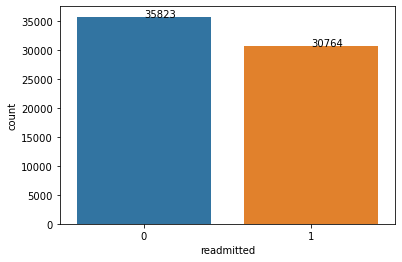

In [30]:
#import seaborn as sns

y_count=sns.countplot(x='readmitted',data=df)   
print(y_count.patches)
# Shows the count of observations in each categorical bin using bars

for p in y_count.patches:
    height = p.get_height()
    # Add text to the axes
    y_count.text(p.get_x()+p.get_width()/2, height + 1, height)
# The y_count.text method takes an x position, a y position and a string

Text(0.5, 1.0, 'no. of medication used vs readmission')

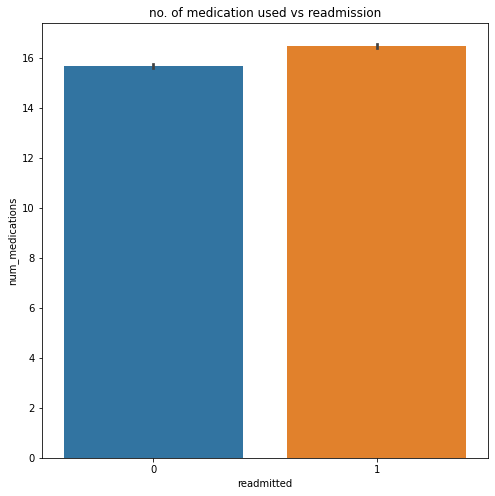

In [31]:
fig = plt.figure(figsize = (8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("no. of medication used vs readmission")

Text(0.5, 1.0, 'age vs readmission')

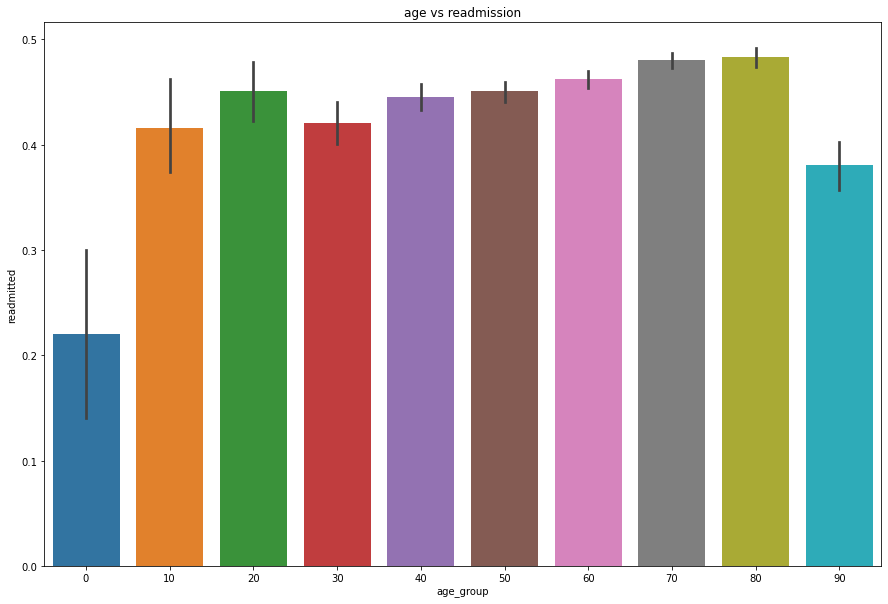

In [32]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = df['age_group'], y = df['readmitted']).set_title("age vs readmission")

In [33]:
df.describe()   

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,...,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes,age_group
count,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,...,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,...,0.111628,0.992836,0.007013,0.000075,0.000180,0.000015,0.000075,0.539054,0.768994,60.910989
std,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,...,0.314911,0.084335,0.083452,0.008665,0.013423,0.003875,0.008665,0.498476,0.421479,15.905823
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000
50%,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.000000
75%,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.000000
max,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000


# X-y split (Input-Output Split)

In [34]:
X = df.loc[:,df.columns!="readmitted"]
type(X) 
# Separating the output from the dataset
#  X contains only non target variables

pandas.core.frame.DataFrame

In [35]:
# Checking the first fove rows of the input columns

X.head()

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,...,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes,age_group
0,51521940,4,39,1,9,1,1,4,32.970966,9,...,0,1,0,0,0,0,0,1,1,80
1,92631357,3,34,1,12,0,0,0,94.116731,6,...,0,1,0,0,0,0,0,1,0,60
2,30023982,6,50,2,24,0,0,5,64.138297,9,...,0,1,0,0,0,0,0,0,1,50
3,93606021,5,63,0,14,0,0,0,13.832428,7,...,0,1,0,0,0,0,0,0,1,70
4,23464296,9,17,1,11,0,0,0,82.898368,9,...,0,1,0,0,0,0,0,1,0,70


In [36]:
# Checking the shape of the input dataset

X.shape

(66587, 74)

In [37]:
# Creating output column

y = df["readmitted"]
type(y)

pandas.core.series.Series

In [38]:
# Checking teh First five rows of the output

y.head()

0    1
1    0
2    1
3    1
4    1
Name: readmitted, dtype: int64

In [39]:
# Checking the number of rows and coliumns of the output

y.shape

(66587,)

# Test-Train Split

In [40]:
# Importing the tarin test split package

from sklearn.model_selection import train_test_split

In [41]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [42]:
# Checking first five rows of input training dataset

X_train.head()

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,...,X20_Up,X21_No,X21_Steady,X21_Up,X22_Steady,X23_Steady,X24_Steady,change_No,diabetesMed_Yes,age_group
20287,93281373,9,14,1,13,0,1,0,90.054849,9,...,0,1,0,0,0,0,0,0,1,70
15447,113028282,3,1,3,12,0,0,2,42.595673,9,...,0,1,0,0,0,0,0,1,1,70
24681,87186501,5,2,5,16,0,0,0,98.311338,9,...,0,1,0,0,0,0,0,1,0,70
47469,94975245,8,78,0,10,0,0,0,45.814654,9,...,0,1,0,0,0,0,0,1,0,80
10312,40848840,10,78,0,37,0,0,1,17.642925,9,...,0,1,0,0,0,0,0,0,1,70


In [43]:
# Checking the number of rows and columns of input training dataset

X_train.shape

(53269, 74)

In [44]:
# Checking the number of rows and columns of input testing dataset

X_test.shape

(13318, 74)

In [46]:
y_test.shape

(13318,)

In [47]:
X2 = pd.read_csv("test-1617360461595-1660719701431.csv", header=0)

In [48]:
X2.shape

(16647, 48)

In [49]:
X2=pd.get_dummies(X2, columns = ['race','gender'])
#converted nominal data into numerical

In [50]:
X2.dtypes

index                       int64
encounter_id                int64
patient_id                  int64
age                        object
weight                     object
time_in_hospital            int64
medical_specialty          object
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                     object
diag_2                     object
diag_3                     object
diag_4                     object
diag_5                    float64
number_diagnoses            int64
X1                         object
X2                         object
X3                         object
X4                         object
X5                         object
X6                         object
X7                         object
X8                         object
X9                         object
X10                        object
X11           

In [51]:
# Converting non numerical column into numerical usin get dummies method

X2= pd.get_dummies(X2, columns = ["X1","X2","X3","X4","X5","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","change","diabetesMed"],drop_first = True)

In [52]:
X2.shape

(16647, 79)

In [53]:
X2.dtypes

index               int64
encounter_id        int64
patient_id          int64
age                object
weight             object
                    ...  
X21_Steady          uint8
X21_Up              uint8
X22_Steady          uint8
change_No           uint8
diabetesMed_Yes     uint8
Length: 79, dtype: object

In [54]:
X2.groupby('age').size()

age
[0-10)        18
[10-20)      123
[20-30)      289
[30-40)      615
[40-50)     1628
[50-60)     2839
[60-70)     3726
[70-80)     4200
[80-90)     2781
[90-100)     428
dtype: int64

In [55]:
age_id={'[0-10)'    :  0,
        '[10-20)'   :  10,
        '[20-30)'   :  20,
        '[30-40)'   :  30,
        '[40-50)'   :  40,
        '[50-60)'   :  50,
        '[60-70)'   :  60,
        '[70-80)'   :  70,
        '[80-90)'   :  80,
        '[90-100)'  : 90}

X2['age_group']  = X2.age.replace(age_id) 

In [56]:
X2.drop(["age"], axis=1, inplace=True) 

In [57]:
X2.drop(['encounter_id','index','weight',"medical_specialty"], axis=1, inplace=True) 

In [58]:
X2.dtypes

patient_id            int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
                      ...  
X21_Up                uint8
X22_Steady            uint8
change_No             uint8
diabetesMed_Yes       uint8
age_group             int64
Length: 75, dtype: object

In [61]:
X2.drop(["diag_1","diag_2","diag_3","diag_4"], axis=1, inplace=True)

In [62]:
X2.shape

(16647, 71)

In [63]:
X2.tail()

,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,...,X17_Up,X20_No,X20_Steady,X20_Up,X21_Steady,X21_Up,X22_Steady,change_No,diabetesMed_Yes,age_group
16642,71780013,3,51,1,31,0,0,0,54.291561,9,...,0,0,0,0,0,0,0,0,1,70
16643,23318685,2,37,0,8,0,0,0,1.559152,3,...,0,1,0,0,0,0,0,0,1,70
16644,90856791,2,14,0,7,0,0,2,61.857751,7,...,0,1,0,0,0,0,0,1,0,50
16645,3233259,1,35,0,4,0,0,0,8.913960,3,...,0,1,0,0,0,0,0,1,1,70
16646,41817384,1,13,2,18,1,0,0,27.308868,4,...,0,1,0,0,0,0,0,1,1,80


# Training Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7769184562246584

In [66]:
y_train_data_pred = clf.predict(X_test)

In [67]:
y_train_data_predS

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [68]:
# Checking the confision matrix

confusion_matrix(y_test, y_train_data_pred)

array([[5857, 1209],
       [1762, 4490]], dtype=int64)

In [69]:
# Checking the accuracy Score

accuracy_score(y_test, y_train_data_pred)

0.7769184562246584

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_train_data_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      7066
           1       0.79      0.72      0.75      6252

    accuracy                           0.78     13318
   macro avg       0.78      0.77      0.77     13318
weighted avg       0.78      0.78      0.78     13318



In [ ]:
y_test_data_pred = clf.predict(X2)

In [294]:
predictions = clf.predict(X_test)

In [295]:
CSV = pd.DataFrame({'Readmitted': predictions})

In [296]:
CSV.to_csv('Surbhi_S_predictions_submission.csv', index=False)